![](https://storage.googleapis.com/kaggle-datasets-images/1379/2485/a52db2794593657403a4235bfc4147aa/dataset-cover.jpg)

# Step2 - Regression
### Boston Housing: Predicting Boston Housing Prices(https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation)

### Ames House Prices: Advanced Regression Techniques(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

#### Study Regression with 'Boston Housing' Dataset and 'Ames House  Prices' Dataset

# Learning Plan

#### 이 과정을 통해서 배울 수 있는 것은 아래와 같습니다.
- 첫째, 데이터 분석의 전체 Workflow
- 둘째, ML - Regression 알고리즘

### Lesson 2-1: Overview - Regression

### Lesson 2-2: EDA

### Lesson 2-3: Preprocessing

### Lesson 2-4: Model Selection

### Lesson 2-5: Model Evaluation & Prediction


# Reference 

- '파이썬 머신러닝 완벽가이드' by 권철민: https://wikibook.co.kr/ml-definitive-guide/
- Stacked Regressions : Top 4% on LeaderBoard by [Serigne](https://www.kaggle.com/serigne) : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

# Lesson 2-1: Overview - Regression

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()

In [7]:
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.25)

In [9]:
RM_mean = train_data.RM.mean()
RM_std = train_data.RM.std()

MEDV_mean = train_data.MEDV.mean()
MEDV_std = train_data.MEDV.std()

processed_data = (train_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7,0.127330,-0.527835
446,6.28807,0.0,18.10,0.0,0.740,6.341,96.4,2.0720,24.0,666.0,20.2,318.01,17.79,14.9,0.076048,-0.840307
472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36,23.2,0.216707,0.085951
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10,36.5,1.343448,1.570195
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,3.649677,-0.059126


In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## 2-1-1 : 선형 회귀 (Linear regression)

이 강의에서는 $\theta$를 직접 정하지 않고 머신 러닝 알고리즘을 통해 학습하는 방법을 알아볼 것이다. 이 경우 가장 많이 쓰이는 알고리즘은 선형 회귀(linear regression)이다.

구체적인 한 알고리즘에 대해 설명하고 있지만 이 강의에서 설명하는 모델을 정의하고 학습하는 과정은 일반적인 머신 러닝 모델에 모두 적용된다. 

## Model specification

모델을 정의하는 단계이다. 

### 선형 회귀의 전제


설명변수(explanatory variable)와 목적변수(target variable) 사이에 선형 관계가 있다.

> "All models are wrong; some models are useful." - George E. P. Box

### 가정
RM(방의 갯수)와 MEDV(집값) 사이에 선형 관계가 있다

이 예시에서는 RM(방의 갯수)와 MEDV(집값) 사이에 선형 관계가 있다고 가정한다. 즉, RM이 올라갈 수록 MEDV도 일정 비율만큼 상승한다고 가정하는 것이다.

### Notation

* $X$ : input variable, feature
* $y$ : output variable, target variable
* $\theta$ : model parameters

* n : 데이터의 갯수
* m : feature의 갯수
* $x^{(i)}$ : i번째 데이터
* $x^{(i)} = (x^{(i)}_0, x^{(i)}_1, ..., x^{(i)}_m)$
* $\theta = (\theta_0, \theta_1, ... )$

### 가설 (Hypothesis)

가설은 $y$의 예측값을 x의 함수로 표현하는 것이다. 즉, 가설은 다음과 같이 나타낼 수 있다.

$$
\hat{y} = h_\theta(x)
$$

선형 회귀에서 설명변수 하나와 목적변수 사이의 선형 관계를 가정하고, bias가 없다고 가정하면 다음과 같다.

$$
h_\theta (x) = \theta_1x
$$

#### 가설 (Hypothesis) 이해하기

In [11]:
def plot_h(theta_1):
    x = np.linspace(-3, 3)
    y_hat = theta_1 * x
    plt.scatter(x=processed_data.RM_standard, y=processed_data.MEDV_standard)
    plt.plot(x, y_hat, 'r');

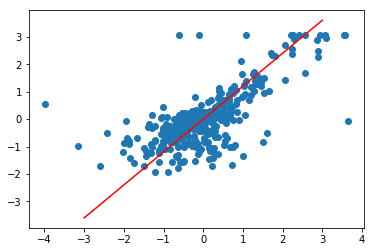

In [12]:
plot_h(1.2)

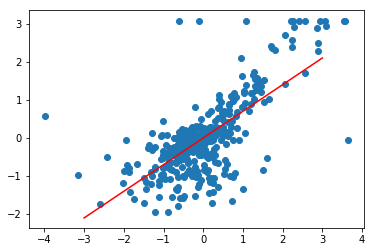

In [13]:
plot_h(0.7)

## Cost function

좋은 $\theta$를 찾기 위해서는, 어떤 $\theta$가 좋은 $\theta$인지 평가할 수 있어야 한다.  Cost function은 모델이 얼마나 틀렸는지를 측정하는 함수이다. Loss function, Object function이라고 불리며 $J(\theta)$로 표기한다.

$$
Cost = J(\theta)
$$

### 선형회귀 문제에서 Cost Function

앞 강의에서 보았듯이 회귀 모델을 평가할 때 널리 쓰이는 방법은 잔차 제곱의 합(RSS : Residual SUm of Squares)이다.

#### 가설 (Hypothesis)

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_1x^{(i)}
$$

#### 매개변수 (Parameter) 

$$
\theta_1
$$

#### 편차

$$
\hat{y}^{(i)} - y^{(i)}
$$

#### Cost function (MSE)

$$
J(\theta) = \frac{1}{2n}\sum^n_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

예컨대, $\theta_1$이 1.2와 0.7일 때 RSS는 다음과 같다.

In [14]:
def RSS(theta_1):
    y_hat = theta_1 * processed_data.RM_standard
    residual = processed_data.MEDV_standard - y_hat
    n = len(residual)
    rss = 1/(2*n) * (residual ** 2).sum()
    return rss

In [15]:
RSS(1.2)

0.36703987744189986

In [16]:
RSS(0.7)

0.24735197776019358

즉, $\theta_1 = 0.7$일 때 $\theta_1 = 1.2$일 때 보다 조금 더 낫다는 것을 알 수 있다.

### $h_\theta(x)$와 $J(\theta)$의 차이

$h_\theta(x)$의 함수값은 $\theta$가 고정되어 있고 $x$ 따라 변한다. 이에 비해 $J(\theta)$는 $x$와 $y$가 주어진 데이터로 고정되어 있고 $\theta$에 따라 값이 변한다. 

### $J(\theta)$의 그래프

$\theta$에 따라 변하는 $J(\theta)$의 그래프를 그려보면 다음과 같다.

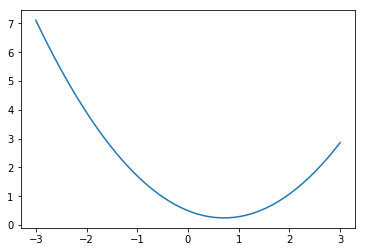

In [17]:
thetas = np.linspace(-3, 3)
plt.plot(thetas, [RSS(theta) for theta in thetas]);

0.7 ~ 0.8 사이에서 최솟값이 있다는 것을 알 수 있다.

## Training

### 경사 하강법 (Gradient Descent)

$J(\theta)$를 극소화하는 $\theta$를 자동으로 찾아주는 알고리즘이 경사 하강법 (Gradient Descent)이다. 

$$
\theta_j := \theta_j - \alpha{\partial\over\partial\theta_j}J(\theta)
$$

* $\alpha$ : 학습 속도 (learning rate)
* ${\partial\over\partial\theta_j}J(\theta)$ : 기울기 (derivative)

#### $\alpha$의 의미

$\alpha$는 학습 속도 (learning rate)라고 불리며 경사 하강법의 하강 속도를 조절하는 역할을 한다. 이 값은 분석가가 직접 지정해주는 hyperparameter이다.

* $\alpha$가 너무 클 때 : 경사 하강법이 수렴하지 못하고 발산하거나 진동한다.

* $\alpha$가 너무 작을 때 : 경사 하강법이 수렴하는 데 너무 긴 시간이 걸린다.

#### 극소점 (Local minimum)에 빠질 위험

경사 하강법은 최솟값을 찾는 절대적인 알고리즘은 아니다. 최솟값이 아닌 극소점 (local minimum), 즉 주변보다는 낮지만 가장 낮은 값은 아닌 지점에 빠질 위험이 있다.



![local minimum](https://files.slack.com/files-pri/T25783BPY-F5YFG1S8N/screenshot.png?pub_secret=7d691ade3a)

#### 선형 회귀를 위한 경사 하강법 (Gradient descent for linear regression)

$$
h_\theta(x) = \theta_1x
$$

$$
J(\theta) = J(\theta_1) = \frac{1}{2n}\sum^n_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})^2
$$

$$
{\partial\over\partial\theta_1}J(\theta_1) = \frac{1}{n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})x^{(i)}
$$

$$
\theta_1 := \theta_1 - \alpha{\partial\over\partial\theta_j}J(\theta) = \theta_1 - \alpha\frac{1}{n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})x^{(i)}
$$

##### In code

In [90]:
x = processed_data.RM_standard
y = processed_data.MEDV_standard
n = len(x)
alpha = 0.3
theta_1 = initial_theta_1 = -0.2

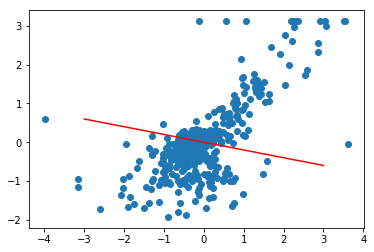

In [91]:
plot_h(theta_1)

theta_1 : 0.07239315141307656 Cost : 0.6603289435102131 gradient : -0.9079771713769219


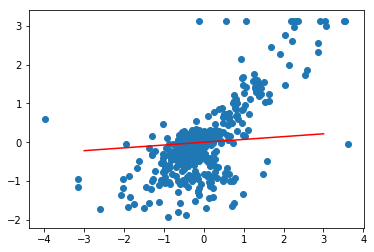

theta_1 : 0.26328397203395537 Cost : 0.45000330827438484 gradient : -0.6363027354029295


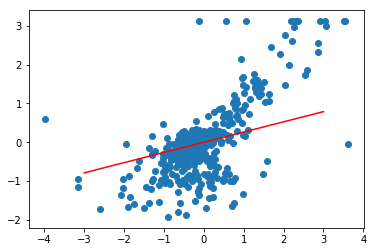

theta_1 : 0.3970586473819907 Cost : 0.3467105366864006 gradient : -0.44591558449345114


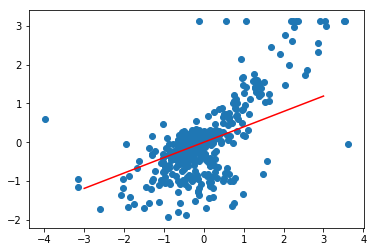

theta_1 : 0.4908068103699542 Cost : 0.29598254696529747 gradient : -0.3124938766265451


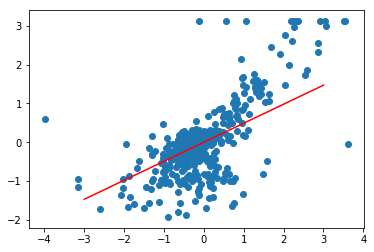

theta_1 : 0.5565047314507012 Cost : 0.27106958450352064 gradient : -0.21899307026915682


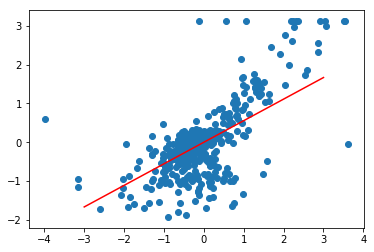

theta_1 : 0.6025452798386866 Cost : 0.2588346092554537 gradient : -0.15346849462661774


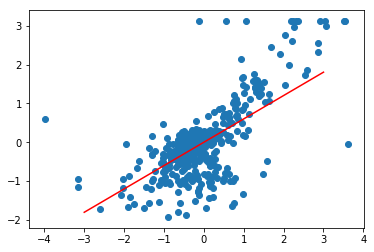

theta_1 : 0.6348101074161243 Cost : 0.25282590517016107 gradient : -0.10754942525812575


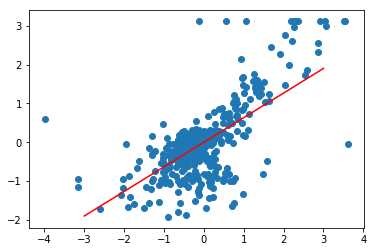

theta_1 : 0.6574210261616849 Cost : 0.2498749776813369 gradient : -0.07536972915186858


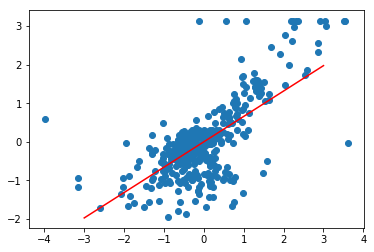

theta_1 : 0.6732665671084418 Cost : 0.24842575120576182 gradient : -0.052818469822523154


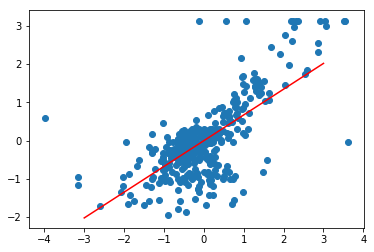

theta_1 : 0.6843709884157205 Cost : 0.24771402332174555 gradient : -0.037014737690929195


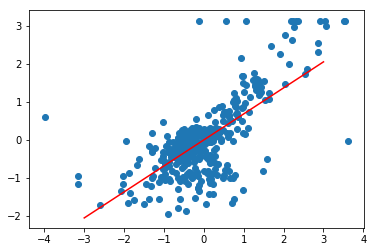

theta_1 : 0.6921528731102146 Cost : 0.2473644874904424 gradient : -0.025939615648313447


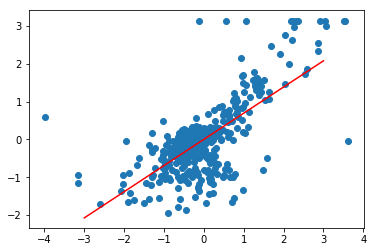

theta_1 : 0.6976063521995486 Cost : 0.24719282736568346 gradient : -0.01817826363111358


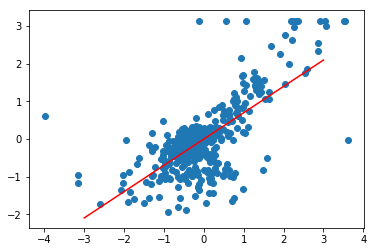

theta_1 : 0.7014281043001479 Cost : 0.24710852356677798 gradient : -0.012739173668664382


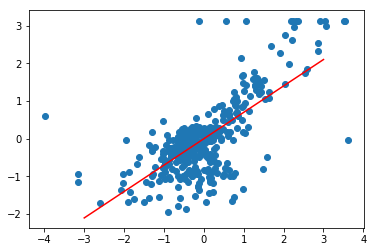

theta_1 : 0.7041063559041563 Cost : 0.24706712122875843 gradient : -0.008927505346694604


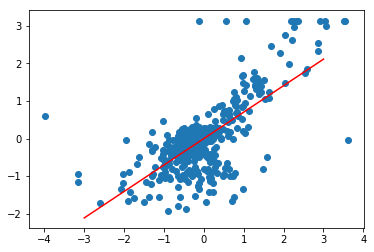

theta_1 : 0.7059832520150392 Cost : 0.24704678817596837 gradient : -0.006256320369609729


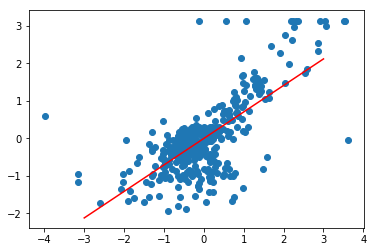

theta_1 : 0.707298564962402 Cost : 0.24703680243469098 gradient : -0.004384376491209339


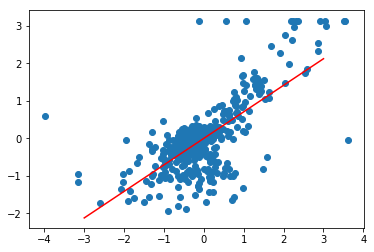

theta_1 : 0.7082203251703691 Cost : 0.2470318983492152 gradient : -0.003072534026557305


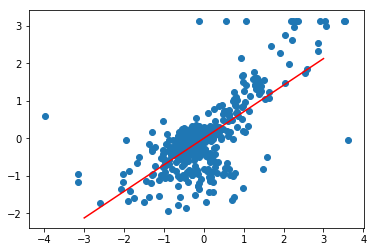

theta_1 : 0.7088662869414406 Cost : 0.2470294899096527 gradient : -0.00215320590357156


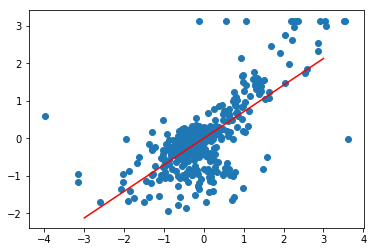

theta_1 : 0.7093189714965767 Cost : 0.24702830710377494 gradient : -0.0015089485171203342


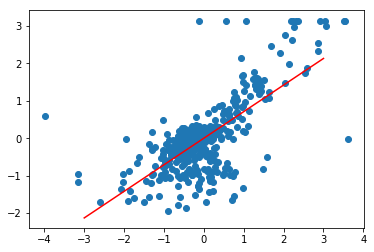

theta_1 : 0.7096362090106774 Cost : 0.24702772621739266 gradient : -0.0010574583803354758


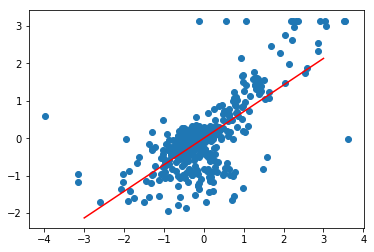

In [92]:
costs = []
iterations = []
for i in range(20):
    y_hat = theta_1 * x
    residual = y_hat - y

    cost = (residual ** 2).sum()/(2*n)

    gradient = 1/n * (residual*x).sum()

    theta_1 -= alpha * gradient
    
    print('theta_1 :', theta_1, 'Cost :', cost, 'gradient :', gradient)
    plot_h(theta_1)
    plt.show()
    
    iterations.append(i)
    costs.append(cost)

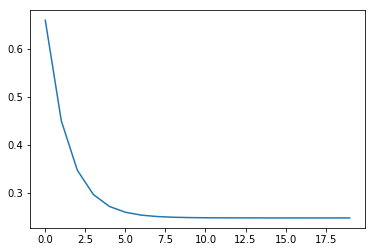

In [96]:
plt.plot(iterations, costs)

#### Normal Equation

ref :  https://daeson.tistory.com/172

$$
\theta = (X^TX)^{-1}X^Ty
$$

* 역행렬 (inverse matrix) 연산은 느리다.
* $(X^TX)$의 역행렬이 존재하지 않을 수 있다.
  * 쓸모 없는 (선형종속인) 변수들
  * 변수들이 너무 많을 때 ($n < m$)

# Lesson 2-2: EDA

## 2-2-1 : 문제 정의하기

### 아이오와 주 에임스(Ames)에 있는 주거용 주택을 설명하는 79가지 변수로 각 주택의 최종 가격을 예측합니다.

## 2-2-2 : 훈련, 테스트 데이터 확인하기

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./data/ames_house_prices"]).decode("utf8")) #check the files available in the directory

data_description.txt
test.csv
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./data/ames_house_prices/train.csv')
test = pd.read_csv('./data/ames_house_prices/test.csv')

In [3]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#explore data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Lesson 2-3: Preprocessing

## 2-3-1 : Outliers

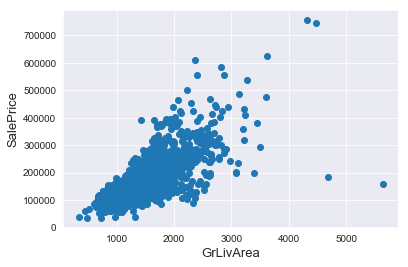

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### <관측 결과>

Training 데이터의 GrLivArea 중 오른쪽 하단에 이상치(outlier) 2개를 볼 수 있습니다. 삭제합니다.

Training 데이터의 이상치를 삭제하는 것은 안전합니다. 하지만 Test 데이터의 이상치를 삭제하는 것은 모델에 악영향을 줄 수 있습니다.

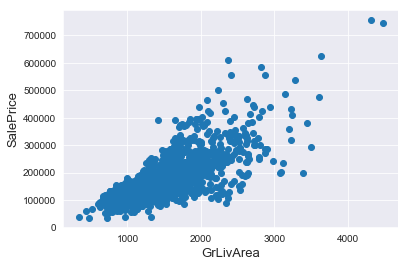

In [9]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 2-3-2 : Target Variable

**SalePrice** 는 예측해야할 변수입니다.


 mu = 180932.92 and sigma = 79467.79



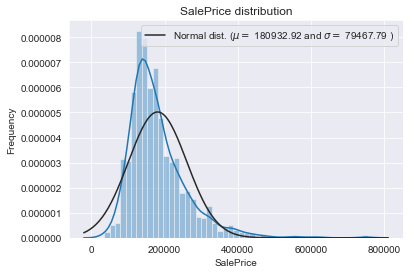

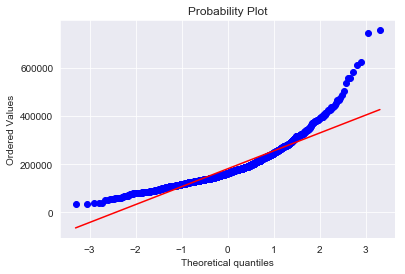

In [10]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### <관츨 결과>

**SalePrice** 가 우편향되어 있습니다. 일반적으로 모델은 편향되지 않은 Normal Distribution이 좋습니다. **SalePrice** 분포를 변형합니다.

### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



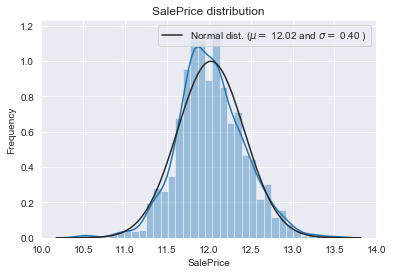

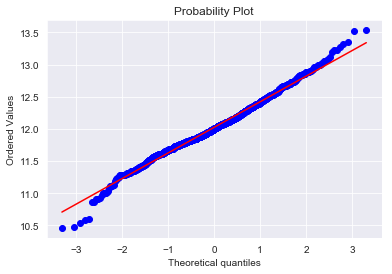

In [11]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## 2-3-3 : Features engineering

먼저 동일한 DataFrame에 Training 데이터와 Test 데이터를 Concatenate 합니다.

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Missing Data

In [14]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

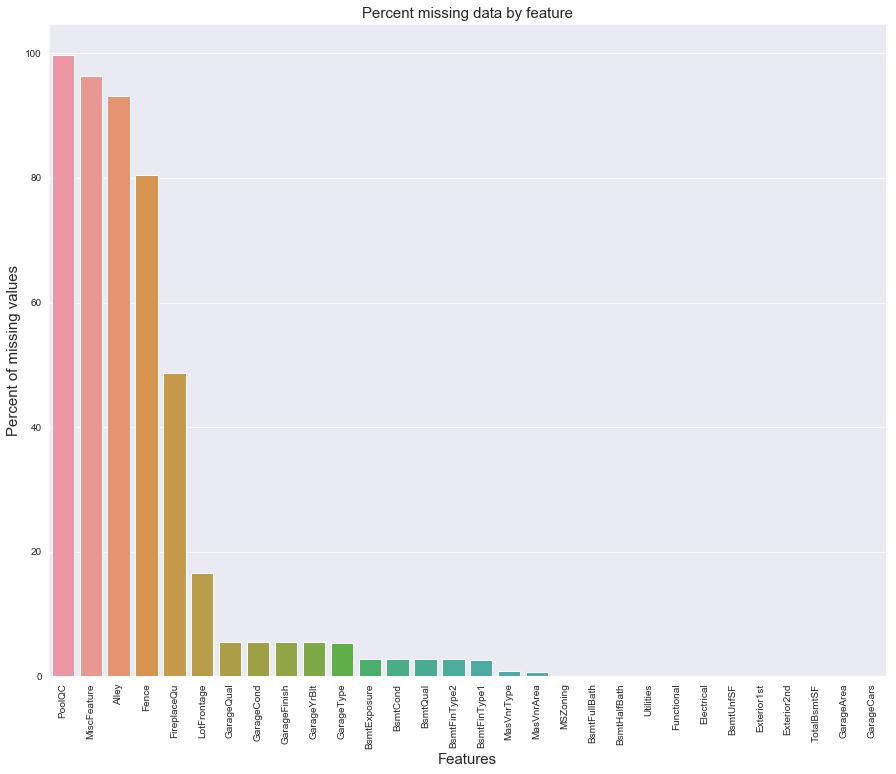

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Data Correlation

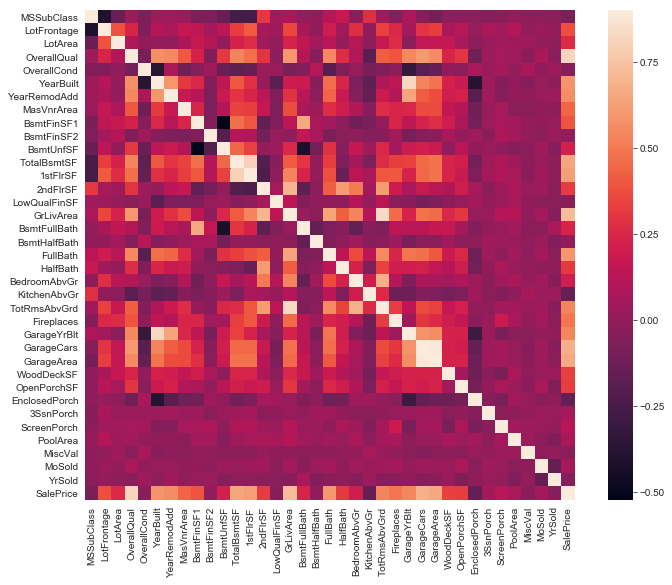

In [16]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### missing values 처리하기